# Deep Learning Regression Project using Feed Forward Neural Networks

## Title: King County House Price Prediction

### by Valentina Angelovska

________________________

### About the Dataset:

The dataset provides valuable insights into the real estate market in King County during the specified timeframe. It can be used to analyze trends, patterns, and factors influencing housing prices, aiding researchers, analysts, and enthusiasts in making informed decisions and predictions related to property values.


| Column            | Type        | Description                                                                                      |
|-------------------|-------------|--------------------------------------------------------------------------------------------------|
| `id`              | Categorical | Unique identifier for each house.                                                                |
| `date`            | Numerical   | Date when the house was sold.                                                                    |
| `price`           | Numerical   | Sale price of the house.                                                                         |
| `bedrooms`        | Numerical   | Number of bedrooms in the house.                                                                 |
| `bathrooms`       | Numerical   | Number of bathrooms in the house.                                                                |
| `sqft_living`     | Numerical   | Size of the living area in square feet.                                                          |
| `sqft_lot`        | Numerical   | Size of the lot in square feet.                                                                  |
| `floors`          | Numerical   | Total number of floors in the house.                                                             |
| `waterfront`      | Categorical | Indicates whether the property has a waterfront (`1` for yes, `0` for no).                      |
| `view`            | Categorical | Index from 0 to 4 representing the quality of the view.                                          |
| `condition`       | Categorical | Condition of the house, ranked from 1 to 5.                                                      |
| `grade`           | Categorical | Classification by construction quality, referring to the materials used and quality of workmanship. |
| `sqft_above`      | Numerical   | Square footage of the house above ground.                                                        |
| `sqft_basement`   | Numerical   | Square footage of the basement.                                                                  |
| `yr_built`        | Numerical   | Year when the house was built.                                                                   |
| `yr_renovated`    | Numerical   | Year when the house was renovated (0 if never renovated).                                        |
| `zipcode`         | Categorical | 5-digit zip code of the house location.                                                           |
| `lat`             | Numerical   | Latitude coordinate of the house.                                                                |
| `long`            | Numerical   | Longitude coordinate of the house.                                                               |
| `sqft_living15`   | Numerical   | Average size of interior living space for the 15 closest houses, in square feet.                 |
| `sqft_lot15`      | Numerical   | Average size of land lots for the 15 closest houses, in square feet.                             |




Link : https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/data





In this project, I will focus on predicting the `price` based on the features listed above.

## Load Libraries

In [1]:
# Basic Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
import tensorflow as tf
import keras
from tqdm import tqdm

#Skelarn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#Keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, BatchNormalization, Input
from keras.regularizers import L1L2
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Randomized
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

## Load Data

In [2]:
# Load Dataset
df = pd.read_csv('kc_house_data.csv')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Data Analysis

In [45]:
print(f'This dataset has {df.shape[0]} instances and {df.shape[1]} features')

This dataset has 21613 instances and 21 features


In [46]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [47]:
# Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [48]:
# Missing Values
print(f'This dataset has {df.isna().sum().sum()} missing values\n')

This dataset has 0 missing values



In [49]:
# Duplicates
print(f'This dataset has {df.duplicated().sum()} duplicates\n')

df[df.duplicated()]

This dataset has 0 duplicates



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [50]:
# Unique values
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

## Conclusion from Preliminary Analysis:

**Shape:**
- This dataset has **21613 instances** and **21 features**.

**Missing Values:**
- This dataset has `no missing values`.

**Standard Deviation:**
- There are **no features with a standard deviation of zero**.

**Duplicates:**
- There are **no duplicates** in this dataset.

**Irrelevant Features:**
- In my opinion fatures that should be dropped are: `id`,`date`,`yr_built`,`yr_renovated`.

<!-- **Data Types:**

- This dataset consists solely of numerical features. While most features are of type int64, the target feature is of type float64. To optimize memory usage and improve performance, features with smaller value ranges will be converted to int16 or int8, as appropriate. -->
________________


## Exploratory Data Analysis

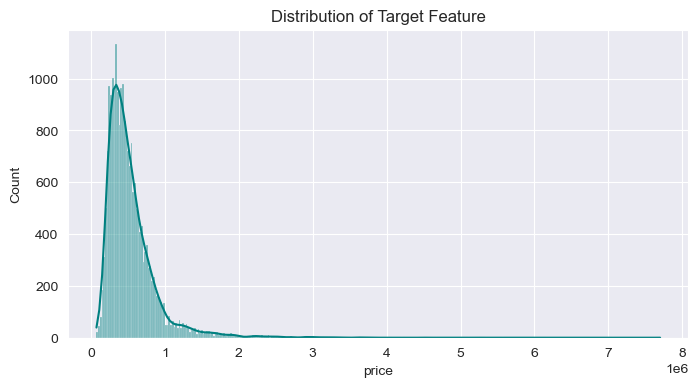

In [51]:
# Distribution of Target Feature

plt.figure(figsize = (8,4))
sns.histplot(df['price'], kde = True, color = 'teal')
plt.title('Distribution of Target Feature')

plt.show()

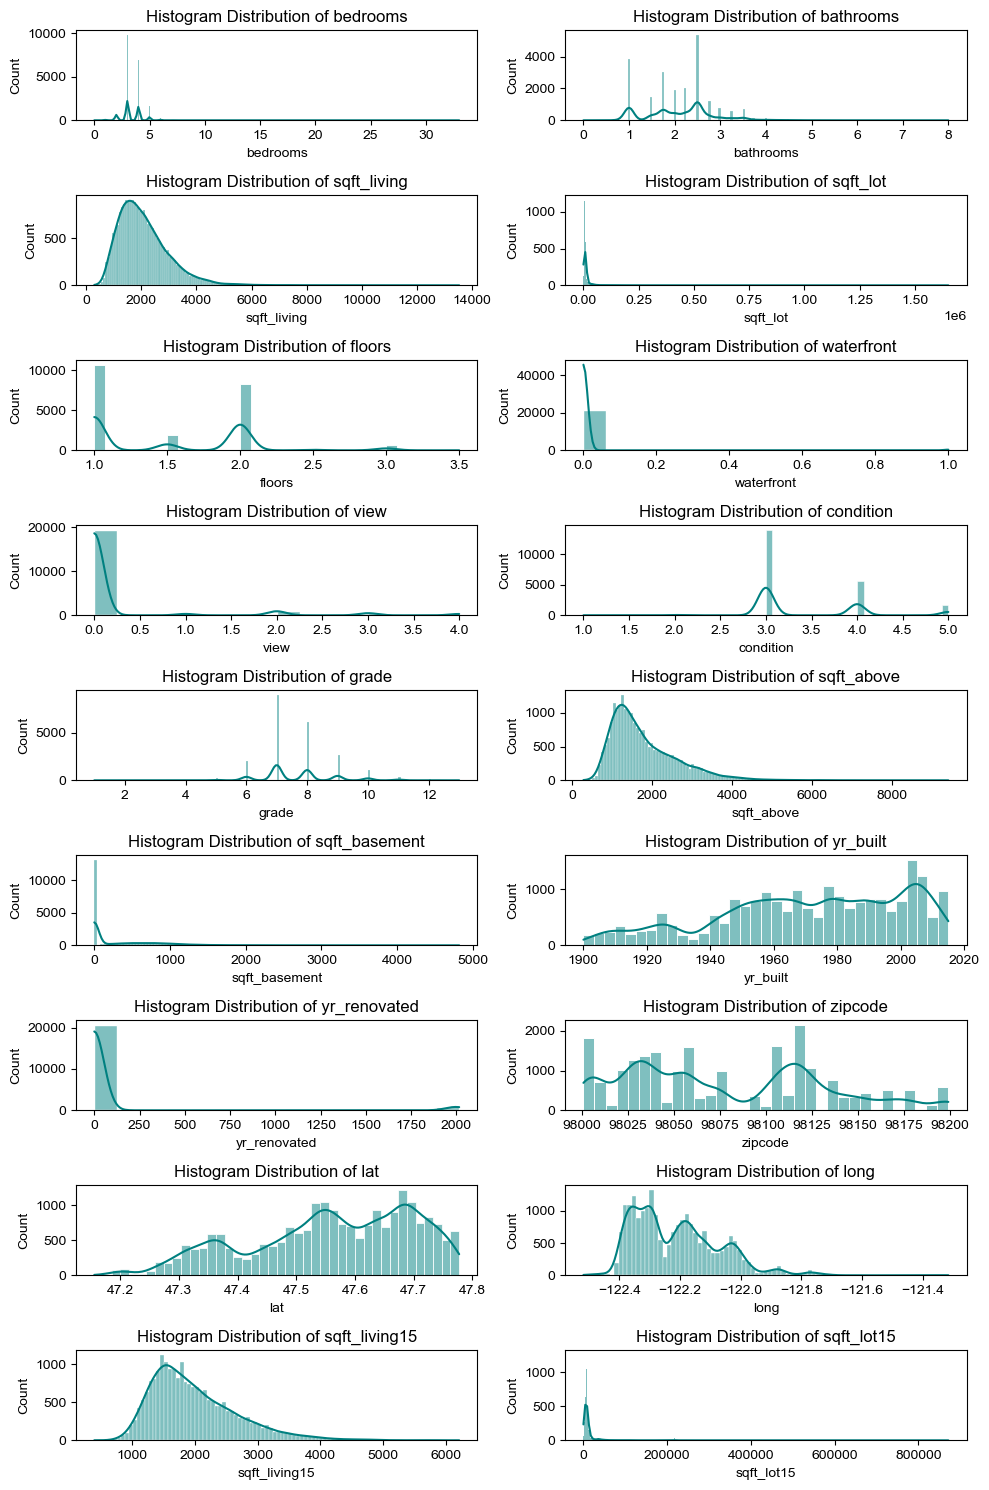

In [10]:
# Define subplots
fig,axs = plt.subplots(nrows = 9, ncols = 2, figsize = (10,15))
sns.set_style('darkgrid')
axs = axs.ravel()

# Loop through the features and plot
for i,col in enumerate(df.columns[3:]):
    sns.histplot(df[col], ax=axs[i], kde=True, color = 'teal')
    axs[i].set_title(f'Histogram Distribution of {col}')

    
# Show
plt.tight_layout()
plt.show()

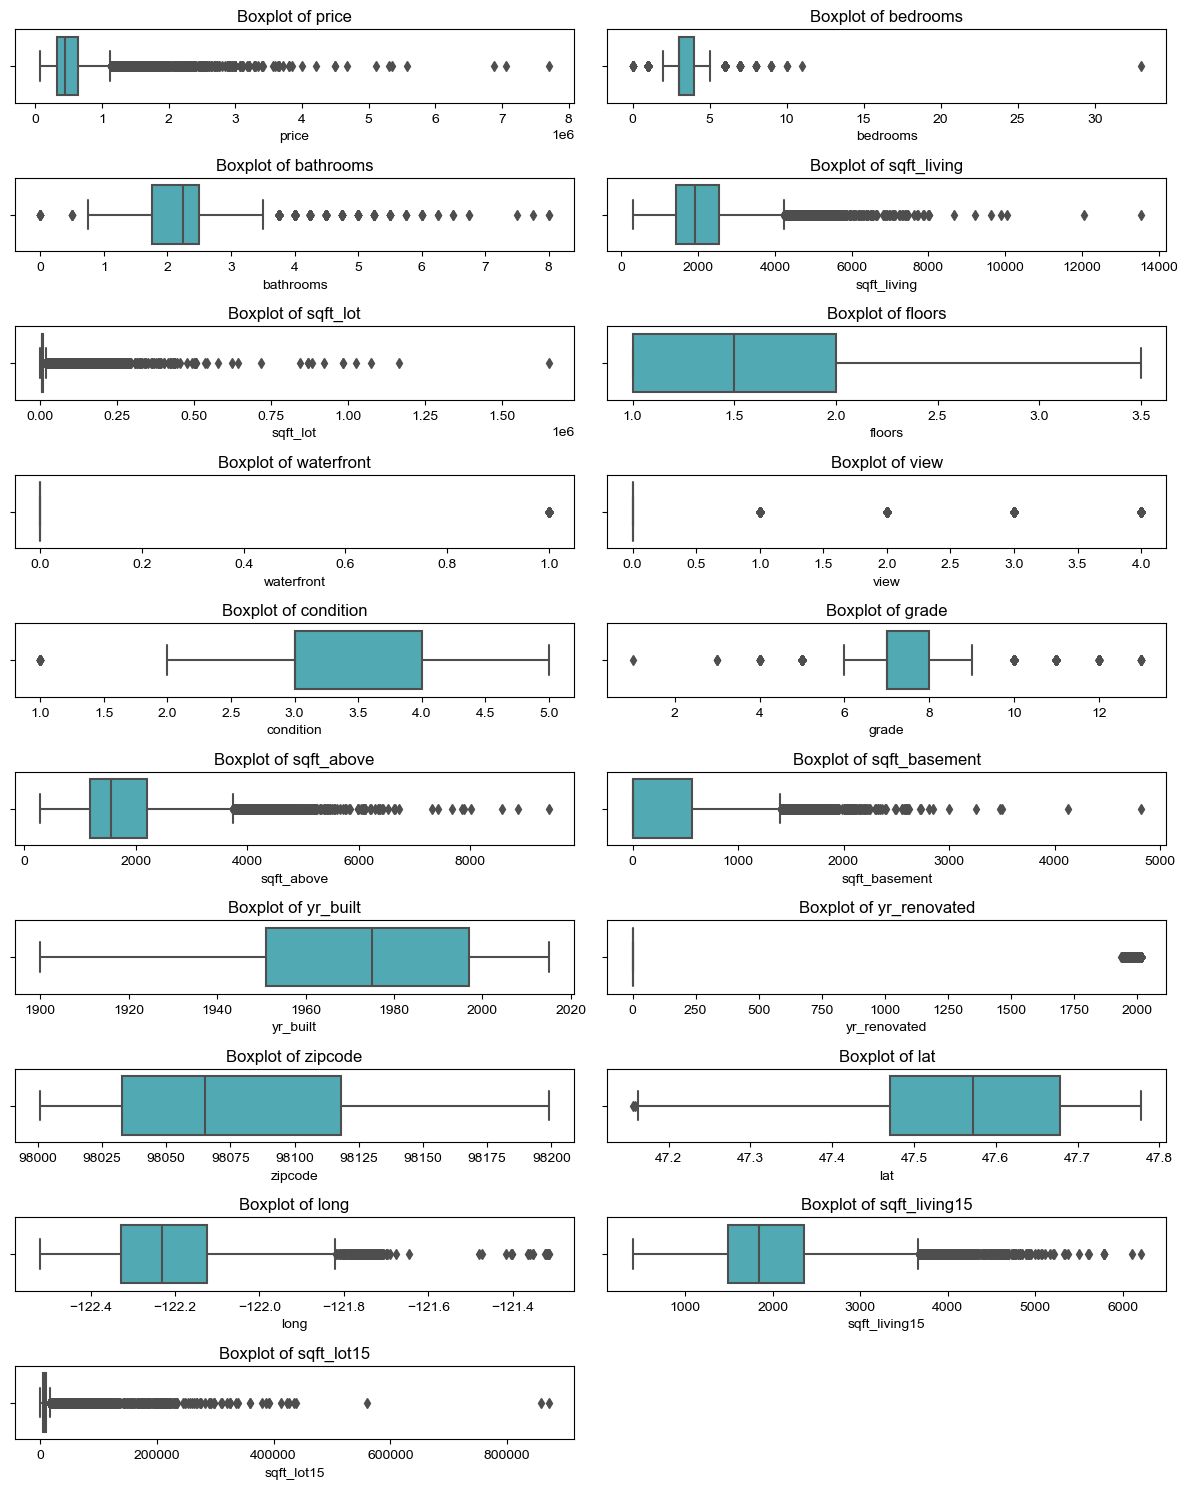

In [3]:
# Define subplots
fig,axs = plt.subplots(nrows = 10, ncols = 2, figsize = (12,15))
sns.set_style('darkgrid')
axs = axs.ravel()

# Loop through the features and plot
for i,col in enumerate(df.columns[2:]):
    sns.boxplot(data = df, x = df[col], ax=axs[i], palette = 'YlGnBu')
    axs[i].set_title(f'Boxplot of {col}')

    
# Delet subplots that are еxcess
for j in range(len(df.columns[2:]), len(axs)):
    axs[j].axis('off')
    
# Show
plt.tight_layout()
plt.show()

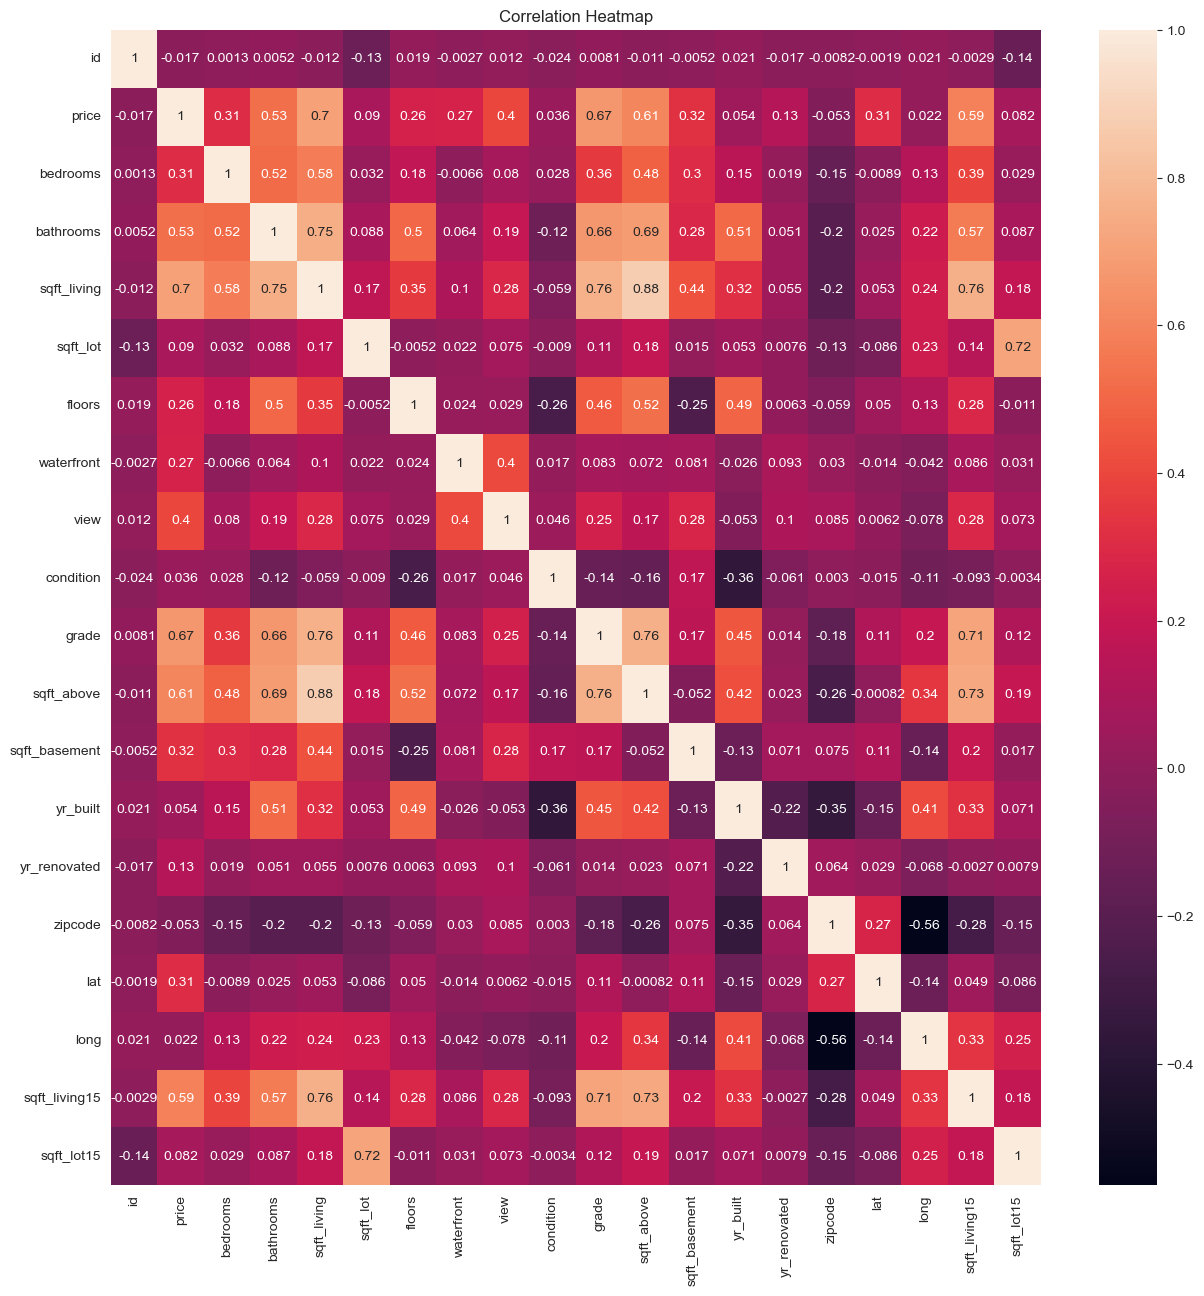

In [12]:
# Correlation Matrix
df_corr = df.corr(numeric_only=True)

# Plot
plt.figure(figsize = (15,15))
sns.heatmap(df_corr, annot=True)
plt.title('Correlation Heatmap')

# Show
plt.show()

## Conclusion of Exploratory Data Analysis:


- **Target Feature:** The target variable, `price`, shows a skewed distribution with a long right tail. Outliers are present and contribute to this right-skewed pattern.

- **Other Features:** All other features also display skewed distributions, with outliers detected in each.

- **Correlation Analysis:** 
    - **High Correlation with Target:** `sqft_living` shows a strong correlation with `price` (0.7), followed by `grade` (0.67).
    - **Highly Correlated Features:** 
        - `bathrooms` is highly correlated with `sqft_living` (0.75).
        - `sqft_living` is strongly correlated with `sqft_above` (0.88), `grade` (0.76), and `sqft_living15` (0.76).
        - `grade` also shows strong correlations with `sqft_above` (0.76) and `sqft_living15` (0.71).
        - `sqft_lot` shows strong correlation with `sqft_lot15` (0.72)

    
- **Dropping features:** 
    - Features that will be dropped are: `sqft_above` (to avoid multicollinearity), `sqft_living15` (because sqft_living is more predictive of the target variable), `grade` (because sqft_living is more predictive of the target variable) and `sqft_lot15`.

__________________

In [13]:
# Dropping  feature

cols_to_drop = ['id','date','yr_built','yr_renovated','sqft_above','sqft_living15','grade','sqft_lot15']

df.drop(columns = cols_to_drop, inplace = True)

## Splitting Data

In [14]:
# Define target
target = 'price'

In [15]:
# I will create function for this part

def split_data(df):
    
    # Splot on X,y
    X = df.drop(columns = [target])
    y = df[target]
    
    # create bins
    bins = np.linspace(np.min(y), np.max(y)+1, 5)
    y_binned = np.digitize(y, bins)
    
    # Tran-Valid
    X_train,X_vt,y_train,y_vt = train_test_split(X,y,test_size=0.3,shuffle=True,random_state=SEED, stratify=y_binned)
    
    assert X_train.shape[0] == y_train.shape[0]
    assert X_vt.shape[0] == y_vt.shape[0]
    assert X_train.shape[1] == X_vt.shape[1]
    
    # create bins
    bins = np.linspace(np.min(y_vt), np.max(y_vt)+1, 5)
    y_binned_vt = np.digitize(y_vt, bins)
    
    # Valid-Test
    X_val,X_test,y_val,y_test = train_test_split(X_vt,y_vt, test_size=0.5, shuffle=True, random_state=SEED, stratify=y_binned_vt)
    
    assert X_val.shape[0] == y_val.shape[0]
    assert X_test.shape[0] == y_test.shape[0]
    assert X_val.shape[1] == X_test.shape[1]
    
    return X_train.to_numpy(), y_train, X_val.to_numpy(), y_val, X_test.to_numpy(), y_test

In [16]:
X_train,y_train,X_val,y_val,X_test,y_test = split_data(df)

In [17]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_val shape:', X_val.shape)
print('y_val shape:', y_val.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (15129, 12)
y_train shape: (15129,)
X_val shape: (3242, 12)
y_val shape: (3242,)
X_test shape: (3242, 12)
y_test shape: (3242,)


## Data Preprocessing

In [18]:
# Scaling
mms = MinMaxScaler()

X_train = mms.fit_transform(X_train)
X_val = mms.transform(X_val)
X_test = mms.transform(X_test)

## Complete Model Workflow Definition

### Function Definitions:

In [19]:
# Define Function and Hyperparameter Grid

def build_model_and_compile(hyper_params: dict, show_summary: bool = False):
    
    model = Sequential()
    
    # Input layer
    
    model.add(Input(shape = (hyper_params['input_size'],))) #no activation function
    
    # Hidden layers
    
    for u, ac, dp, bn, kr in zip(hyper_params['units'], 
                                 hyper_params['activation'],
                                 hyper_params['dropout'],
                                 hyper_params['batchnormalization'],
                                 hyper_params['kernel_regularizers']):
        
        # Conditionally add kernel regularization
        if hyper_params.get('use_regularization', True) and kr is not None:
            model.add(Dense(units=u, activation=ac, kernel_regularizer=kr))
        else:
            model.add(Dense(units=u, activation=ac))
            
        if bn:
            model.add(BatchNormalization())
        
        if dp > 0.0:
            model.add(Dropout(dp))
            
    # Output layer
    model.add(Dense(units=hyper_params['output_size'])) #for regression no activation func in output
    
    if show_summary == True:
        model.summary()
        
    # Compile
    
    model.compile(optimizer='adam', loss=hyper_params['loss'], metrics = hyper_params['metric']) 
    
    return model    

In [20]:
# Train model
def train_model(model,model_name, X_train,y_train,X_val,y_val,epochs = 100, quiet=False):
    
    # Define checkpoints
    es_cbk = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights=True)
    chp_cbk = ModelCheckpoint(monitor='val_loss', filepath = os.path.join('models', f'{model_name}.keras'), save_best_only=True)
    
    model_history = model.fit(X_train,y_train,
             epochs = epochs,
             batch_size = 64,
             validation_data = (X_val, y_val),
             callbacks = [es_cbk, chp_cbk],
             shuffle=True,
             verbose=0 if quiet else 1)
    
    return model_history

In [21]:
# Plot Learning Curve
def plot_learning_curve(model_history, model_name):
    
    plt.figure(figsize = (10,10))
    plt.plot(model_history.history['loss'], color = 'teal')
    plt.plot(model_history.history['val_loss'], color = 'red')
    plt.title(f'Learning Curve Plot For Model: {model_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train','Val'])
    plt.show()

In [22]:
# Evaluate model 
def evaluate_model(model,model_name,X_test,y_test):
    
    y_predict = model.predict(X_test)
    
    eval_dict = {
        'model' : model_name,
        'MAE' : mean_absolute_error(y_test,y_predict),
        'R2' : r2_score(y_test,y_predict)}
    
    display(pd.DataFrame.from_dict(eval_dict, orient='index'))
    
    return eval_dict

### Model Workflow Loop:

In [23]:
# Add everything in one function

def model_loop(hyper_params: dict, df, model_name, X_train, y_train ,X_val, y_val, X_test, y_test, epochs = 100):
    
    # Create and compile the model
    model = build_model_and_compile(hyper_params)
    print('Model created and compiled.')

    # Train the model
    model_history = train_model(model, model_name, X_train, y_train, X_val, y_val, epochs, quiet=True)
    print('Model trained.')

    # Plot learning curve
    plot_learning_curve(model_history, model_name)
    print('Learning curve plotted.')

    # Evaluate the model
    metrics = evaluate_model(model, model_name, X_test, y_test)
    print('Model evaluated.')
    print("---------------------------------------------------------------------------------------\n\n")
    
    return metrics

### Hyperparameter Definition and Workflow Execution

  0%|          | 0/11 [00:00<?, ?it/s]

model1
Model created and compiled.
Model trained.


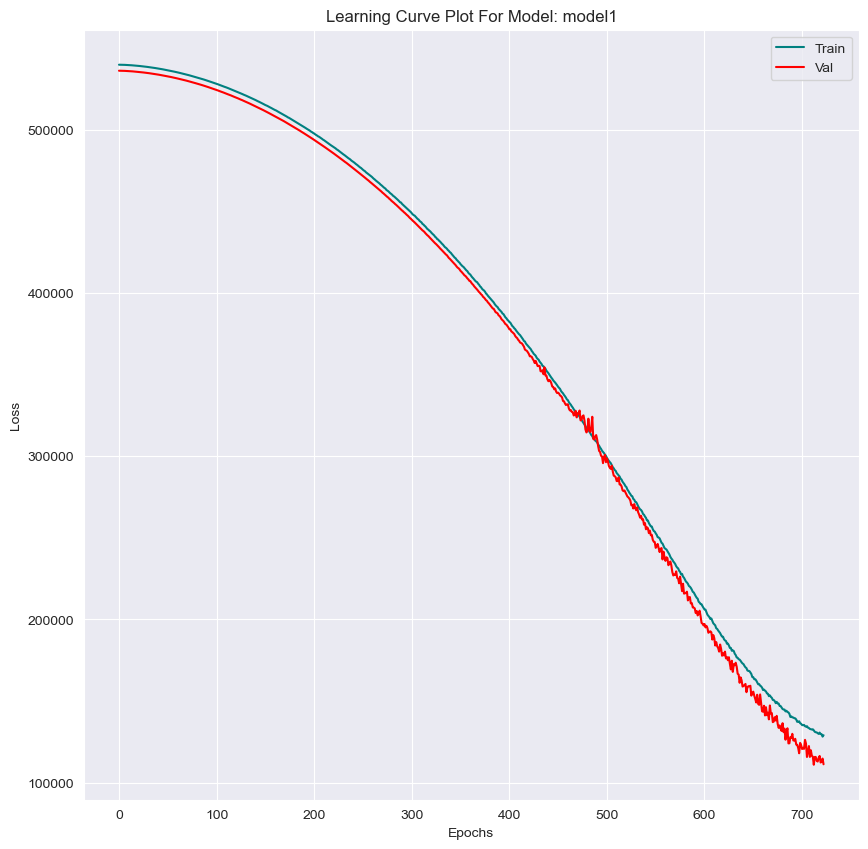

Learning curve plotted.
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,0
model,model1
MAE,113832.566038
R2,0.487339


  9%|▉         | 1/11 [31:55<5:19:10, 1915.04s/it]

Model evaluated.
---------------------------------------------------------------------------------------


model2
Model created and compiled.
Model trained.


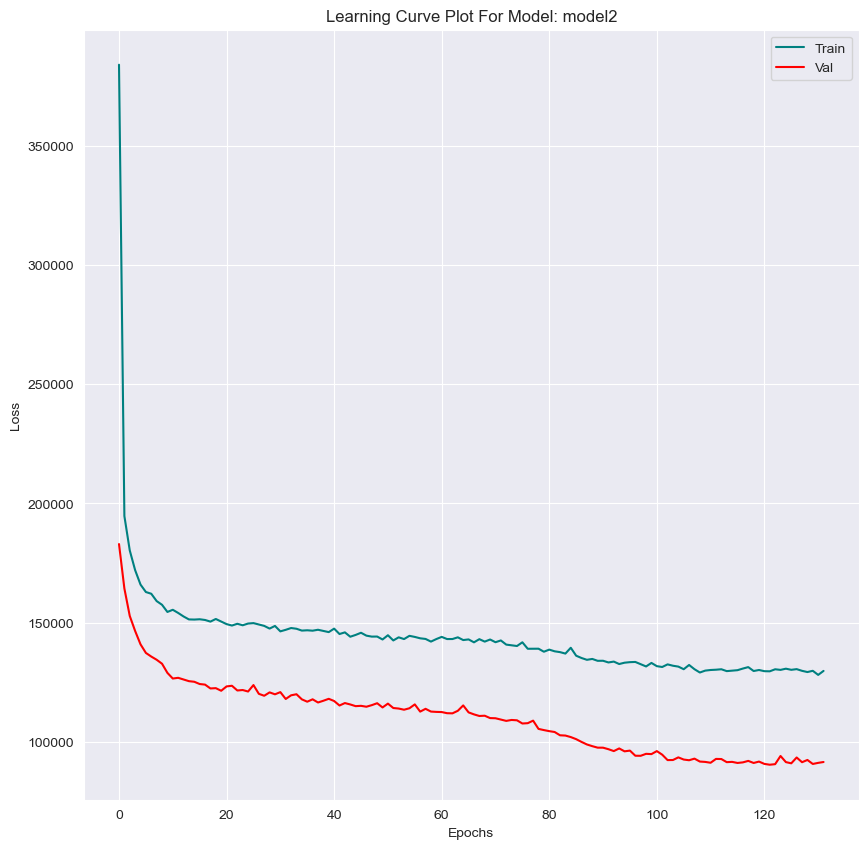

Learning curve plotted.
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,0
model,model2
MAE,91544.348478
R2,0.801465


 18%|█▊        | 2/11 [33:49<2:08:25, 856.14s/it] 

Model evaluated.
---------------------------------------------------------------------------------------


model3
Model created and compiled.
Model trained.


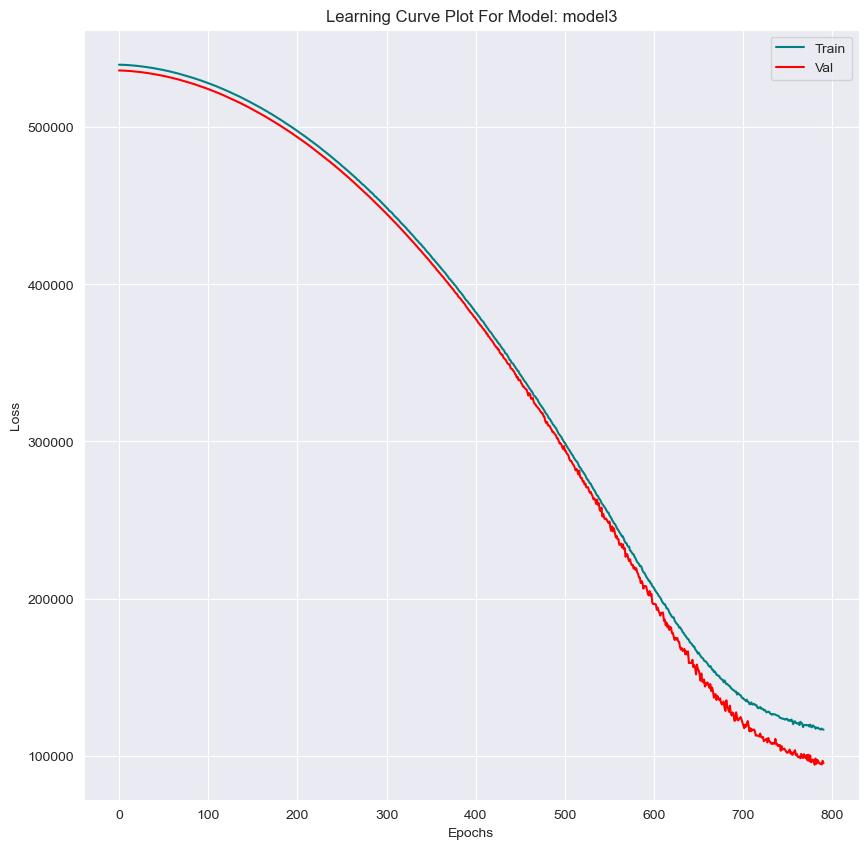

Learning curve plotted.
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,0
model,model3
MAE,96714.281226
R2,0.649266


 27%|██▋       | 3/11 [49:21<1:58:43, 890.41s/it]

Model evaluated.
---------------------------------------------------------------------------------------


model4
Model created and compiled.
Model trained.


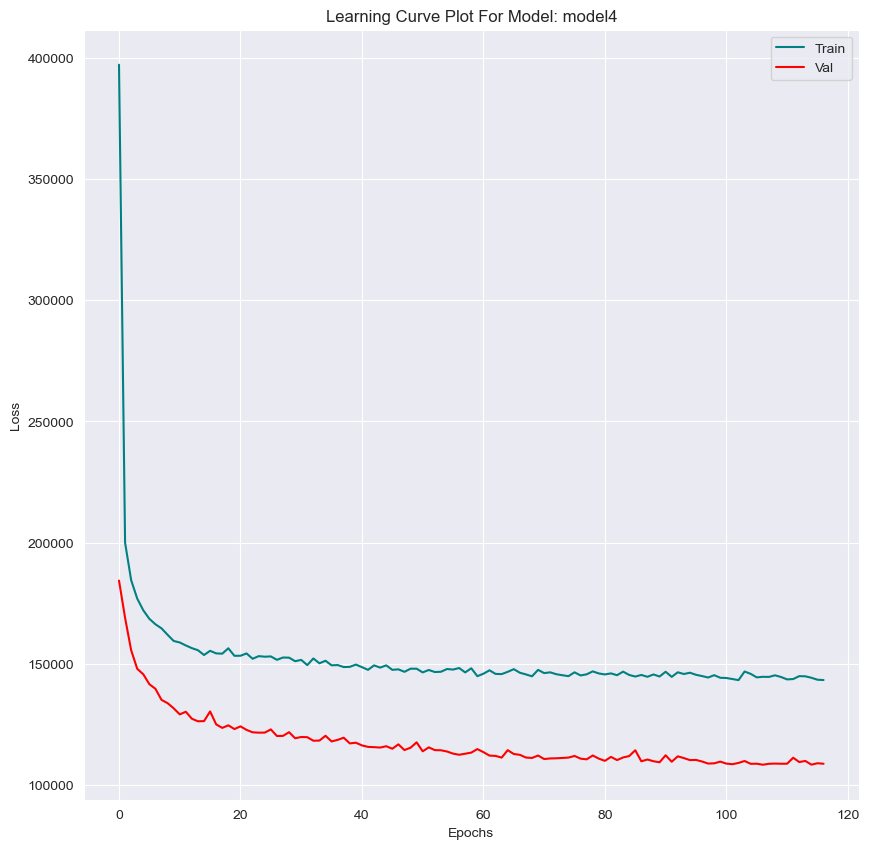

Learning curve plotted.
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,0
model,model4
MAE,110759.452185
R2,0.752651


 36%|███▋      | 4/11 [50:54<1:07:11, 575.86s/it]

Model evaluated.
---------------------------------------------------------------------------------------


model5
Model created and compiled.
Model trained.


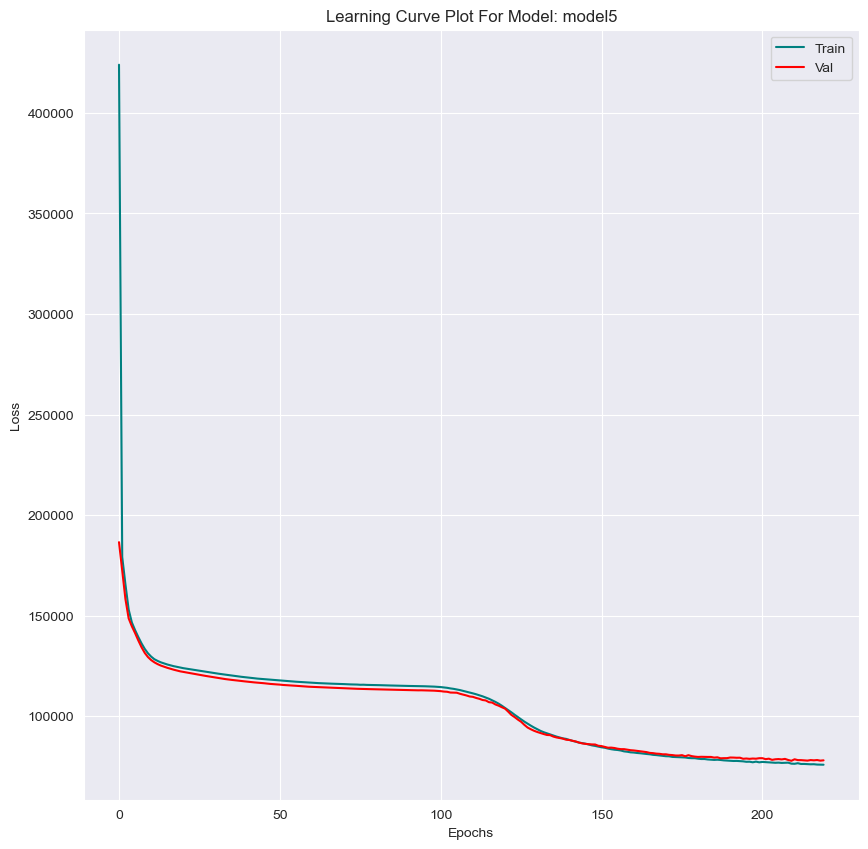

Learning curve plotted.
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,0
model,model5
MAE,80623.663126
R2,0.822598


 45%|████▌     | 5/11 [53:25<42:14, 422.38s/it]  

Model evaluated.
---------------------------------------------------------------------------------------


model6
Model created and compiled.
Model trained.


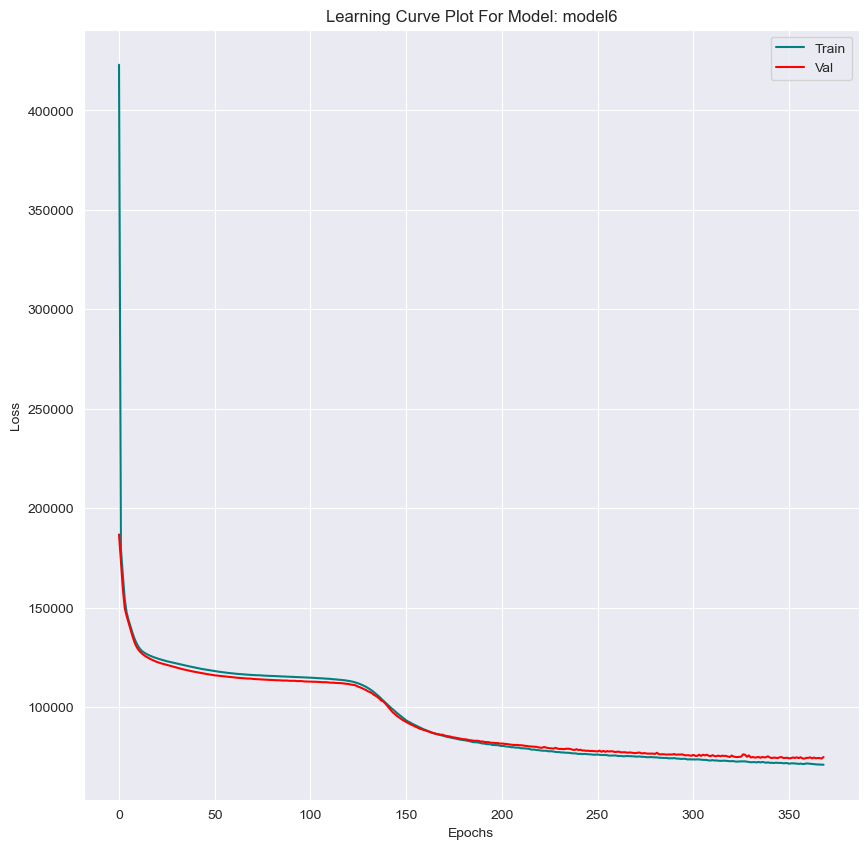

Learning curve plotted.
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,0
model,model6
MAE,78426.093104
R2,0.818078


 55%|█████▍    | 6/11 [57:31<30:12, 362.56s/it]

Model evaluated.
---------------------------------------------------------------------------------------


model7
Model created and compiled.
Model trained.


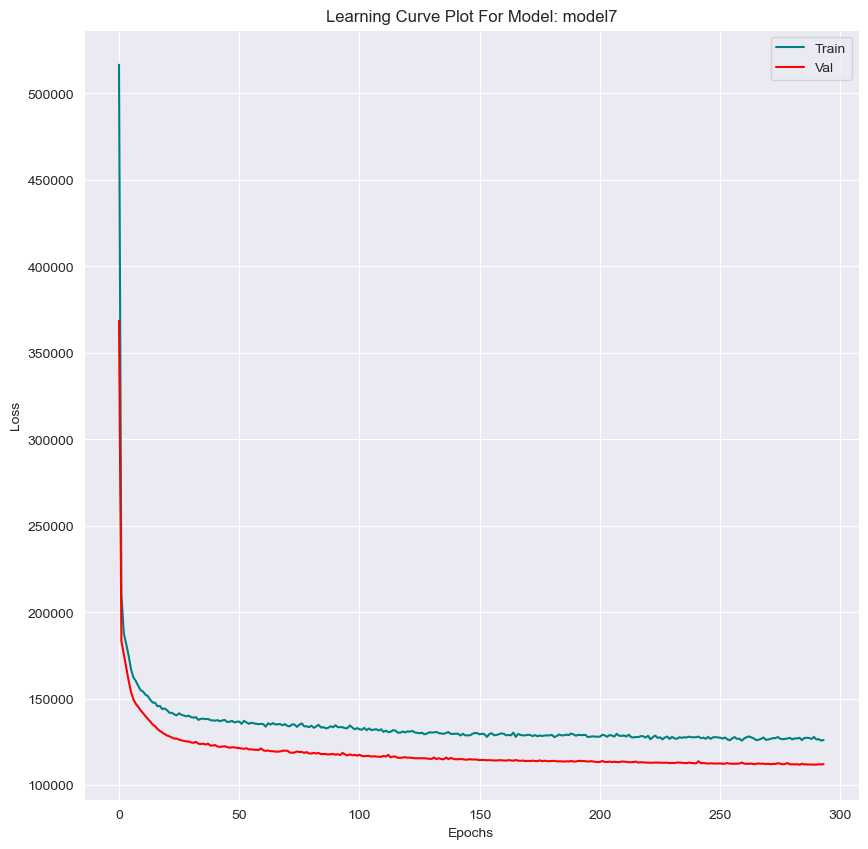

Learning curve plotted.
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,0
model,model7
MAE,114134.198108
R2,0.740179


 64%|██████▎   | 7/11 [1:00:56<20:43, 310.93s/it]

Model evaluated.
---------------------------------------------------------------------------------------


model8
Model created and compiled.
Model trained.


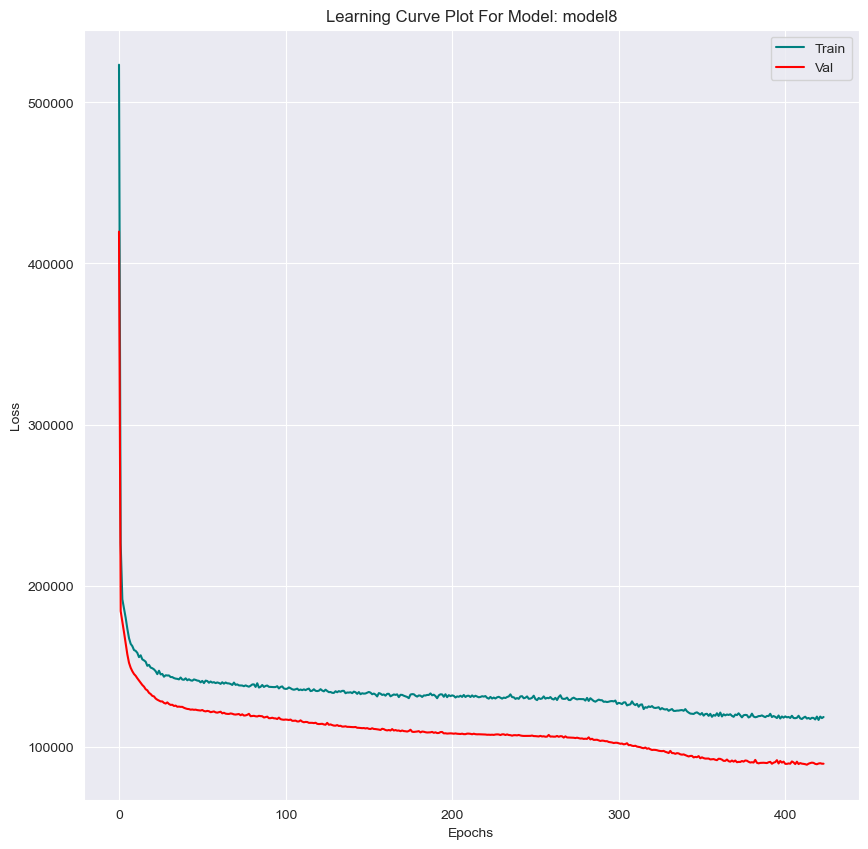

Learning curve plotted.
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,0
model,model8
MAE,90008.024127
R2,0.806699


 73%|███████▎  | 8/11 [1:05:34<15:01, 300.65s/it]

Model evaluated.
---------------------------------------------------------------------------------------


model9
Model created and compiled.
Model trained.


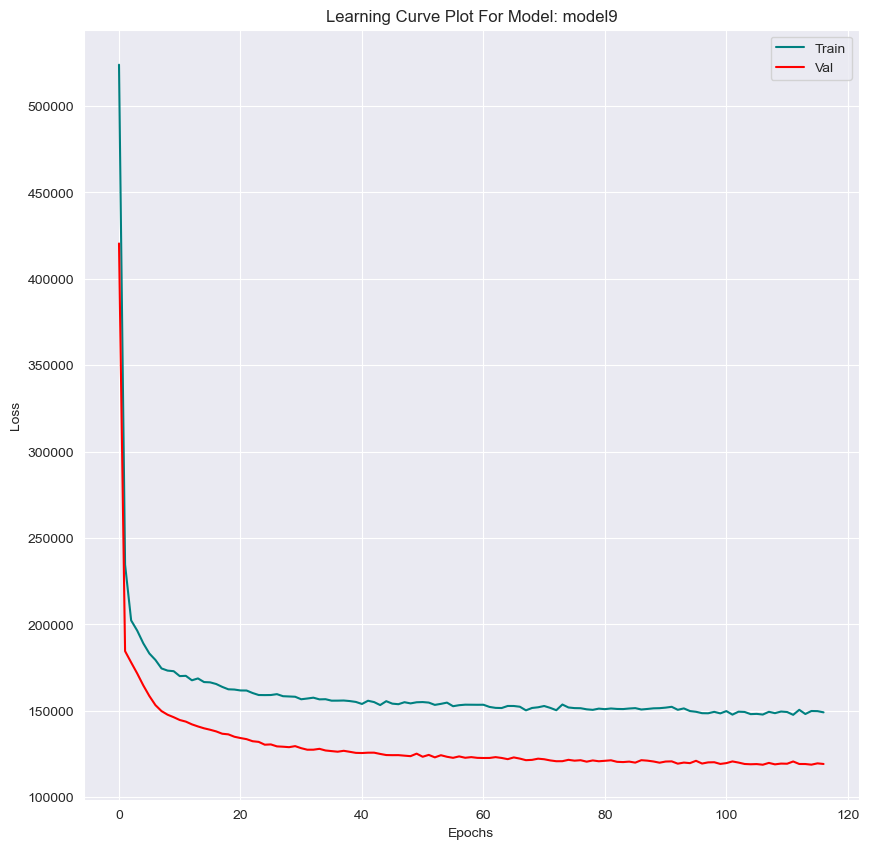

Learning curve plotted.
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,0
model,model9
MAE,121297.299639
R2,0.710155


 82%|████████▏ | 9/11 [1:06:59<07:45, 233.00s/it]

Model evaluated.
---------------------------------------------------------------------------------------


model10
Model created and compiled.
Model trained.


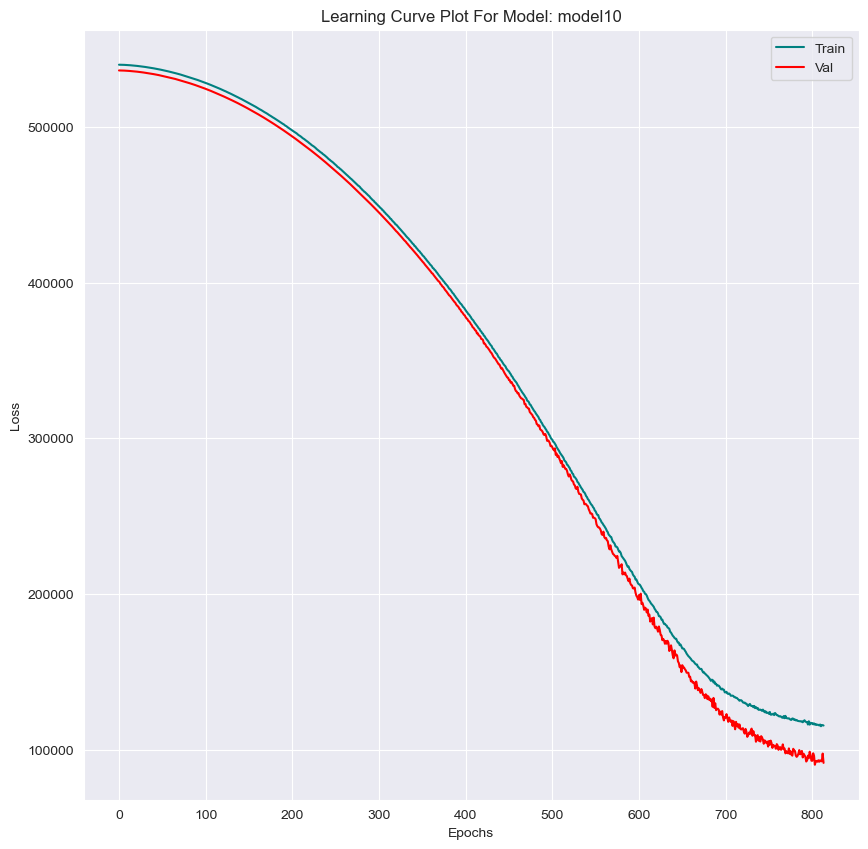

Learning curve plotted.
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,0
model,model10
MAE,92495.974439
R2,0.670883


 91%|█████████ | 10/11 [1:19:40<06:36, 396.19s/it]

Model evaluated.
---------------------------------------------------------------------------------------


model11
Model created and compiled.
Model trained.


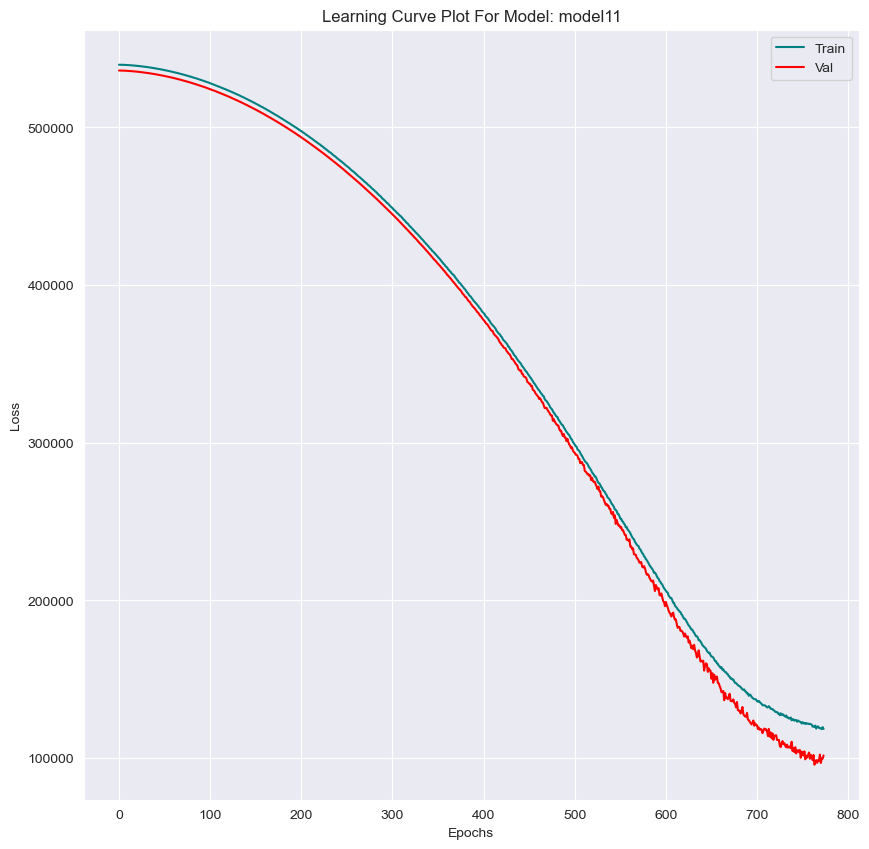

Learning curve plotted.
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


,0
model,model11
MAE,98304.336586
R2,0.61599


100%|██████████| 11/11 [1:37:26<00:00, 531.52s/it]

Model evaluated.
---------------------------------------------------------------------------------------




In [24]:
hyper_params_dict = {
    
    'model1': {
                'input_size' : 12,
                'output_size' : 1,
                'units' : [256,128,64,32,16],
                'activation' : ['relu'] * 5,
                'dropout' : [0.2,0.2,0.2,0.2,0.2],
                'batchnormalization' : [True,True,True,True,True],
                'kernel_regularizers' : [L1L2(l1 = 1e-3, l2 = 1e-4)] * 5,
                'loss': 'mae',
                'metric': ['mae'],
                'use_regularization': True
                },
    
    'model2': {
                'input_size' : 12,
                'output_size' : 1,
                'units' : [256,128,64,32,16],
                'activation' : ['relu'] * 5,
                'dropout' : [0.2,0.2,0.2,0.2,0.2],
                'batchnormalization' : [False,False,False,False,False],
                'kernel_regularizers' : [L1L2(l1 = 1e-3, l2 = 1e-4)] * 5,
                'loss': 'mae',
                'metric': ['mae'],
                'use_regularization': True
                },
    
    'model3': {
                'input_size' : 12,
                'output_size' : 1,
                'units' : [256,128,64,32,16],
                'activation' : ['relu'] * 5,
                'dropout' : [0.2,0.2,0.2,0.2,0.2],
                'batchnormalization' : [True,True,True,True,True],
                'kernel_regularizers' : [L1L2(l1 = 1e-5, l2 = 1e-4)] * 5,
                'loss': 'mae',
                'metric': ['mae'],
                'use_regularization': False
                },
    
    'model4': {
                'input_size' : 12,
                'output_size' : 1,
                'units' : [256,128,64,32,16],
                'activation' : ['relu'] * 5,
                'dropout' : [0.2,0.2,0.2,0.2,0.2],
                'batchnormalization' : [False,False,False,False,False],
                'kernel_regularizers' : [L1L2(l1 = 1e-5, l2 = 1e-4)] * 5,
                'loss': 'mae',
                'metric': ['mae'],
                'use_regularization': False
                },
    
    'model5': {
                'input_size' : 12,
                'output_size' : 1,
                'units' : [256,128,64,32,16],
                'activation' : ['relu'] * 5,
                'dropout' : [0.0,0.0,0.0,0.0,0.0],
                'batchnormalization' : [False,False,False,False,False],
                'kernel_regularizers' : [L1L2(l1 = 1e-3, l2 = 1e-3)] * 5,
                'loss': 'mae',
                'metric': ['mae'],
                'use_regularization': True
                },
    
    'model6': {
                'input_size' : 12,
                'output_size' : 1,
                'units' : [256,128,64,32,16],
                'activation' : ['relu'] * 5,
                'dropout' : [0.0,0.0,0.0,0.0,0.0],
                'batchnormalization' : [False,False,False,False,False],
                'kernel_regularizers' : [L1L2(l1 = 1e-3, l2 = 1e-3)] * 5,
                'loss': 'mae',
                'metric': ['mae'],
                'use_regularization': False
                },
    
    'model7': {
                'input_size' : 12,
                'output_size' : 1,
                'units' : [128,64,32,16],
                'activation' : ['relu'] * 4,
                'dropout' : [0.1,0.1,0.1,0.1],
                'batchnormalization' : [False,False,False,False],
                'kernel_regularizers' : [L1L2(l1 = 1e-3, l2 = 1e-3)] * 4,
                'loss': 'mae',
                'metric': ['mae'],
                'use_regularization': True
                },
    
    'model8': {
                'input_size' : 12,
                'output_size' : 1,
                'units' : [128,64,32,16],
                'activation' : ['relu'] * 4,
                'dropout' : [0.1,0.1,0.1,0.1],
                'batchnormalization' : [False,False,False,False],
                'kernel_regularizers' : [L1L2(l1 = 1e-3, l2 = 1e-3)] * 4,
                'loss': 'mae',
                'metric': ['mae'],
                'use_regularization': False
                },
    
    'model9': {
                'input_size' : 12,
                'output_size' : 1,
                'units' : [128,64,32,16],
                'activation' : ['relu'] * 4,
                'dropout' : [0.2,0.2,0.2,0.2],
                'batchnormalization' : [False,False,False,False],
                'kernel_regularizers' : [L1L2(l1 = 1e-4, l2 = 1e-3)] * 4,
                'loss': 'mae',
                'metric': ['mae'],
                'use_regularization': True
                },
    
    'model10': {
                'input_size' : 12,
                'output_size' : 1,
                'units' : [128,64,32,16],
                'activation' : ['relu'] * 4,
                'dropout' : [0.2,0.2,0.2,0.2],
                'batchnormalization' : [True,True,True,True],
                'kernel_regularizers' : [L1L2(l1 = 1e-4, l2 = 1e-3)] * 4,
                'loss': 'mae',
                'metric': ['mae'],
                'use_regularization': False
                },
    
    'model11' : {
                'input_size': 12,
                'output_size': 1,
                'units': [256, 128, 64, 32, 16],
                'activation': ['relu'] * 5,
                'dropout': [0.2, 0.2, 0.2, 0.2, 0.2],
                'batchnormalization': [True, True, True, True, True],
                'kernel_regularizers': [L1L2(l1=1e-5, l2=1e-4)] * 5,
                'loss': 'mae',
                'metric': ['mae'],
                'use_regularization': False
                }
}
    
eval_results = []
for model_name, hyper_d in tqdm(hyper_params_dict.items())

:
    print(model_name)
    eval_results.append(model_loop(hyper_d, df, model_name, X_train, y_train ,X_val, y_val, X_test, y_test, epochs = 1000))

## Results

In [29]:
# Show results
results = pd.DataFrame(eval_results)

results.sort_values(by = 'R2', ascending = False)

,model,MAE,R2
4,model5,80623.663126,0.822598
5,model6,78426.093104,0.818078
7,model8,90008.024127,0.806699
1,model2,91544.348478,0.801465
3,model4,110759.452185,0.752651
6,model7,114134.198108,0.740179
8,model9,121297.299639,0.710155
9,model10,92495.974439,0.670883
2,model3,96714.281226,0.649266
10,model11,98304.336586,0.615990


In [36]:
print('Best model with lowest MAE Score:\n\n', results.iloc[5])
print('\n\nBest model with highest R2 Score:\n\n', results.iloc[4])

Best model with lowest MAE Score:

 model          model6
MAE      78426.093104
R2           0.818078
Name: 5, dtype: object


Best model with highest R2 Score:

 model          model5
MAE      80623.663126
R2           0.822598
Name: 4, dtype: object


## Final Conclusion

In this project, I followed a comprehensive approach to house price prediction, focusing on the following aspects:

1. **Data Preprocessing:**
   - Normalization was not used during preprocessing.
   - Performed standard data analysis and exploratory data analysis (EDA) to understand and prepare the data.

2. **Model Building Workflow:**
   - Defined a structured workflow for building, compiling, fitting, and evaluating the model.
   - Created a function for data splitting to streamline the model training process.

3. **Model Architecture and Hyperparameters:**
   - Designed and tested a hyperparameter grid consisting of 11 models with various architectures and configurations. This included:
     - Different numbers of hidden layers and neurons.
     - Variations in dropout rates, batch normalization, and regularization methods.
   - Evaluated models based on Mean Absolute Error (MAE) and R-squared (R²) scores.

4. **Best Model Selection:**
   - Chose the final model based on the highest R² score, indicating the best explanation of variance in house prices.
   - The selected model features the following architecture:
     - **Hidden Layers:** 5 layers with [256, 128, 64, 32, 16] neurons.
     - **Activation Function:** ReLU.
     - **Dropout Rate:** None.
     - **Batch Normalization:** Not used.
     - **Kernel Regularization:** L1L2 with \( l1 = 1e-3 \) and \( l2 = 1e-3 \).

5. **Model Performance:**
   - The final model has a high R² score and a relatively low MAE difference (around 2000) compared to other models, indicating that there is no significant error rate in predicting house prices.

6. **Future Improvements:**
   - There is potential for further enhancement by exploring a wider range of hyperparameters, testing larger model architectures, and incorporating normalization techniques.

This structured approach ensures that the model is robust and effective in predicting house prices, while also providing a solid foundation for future improvements and refinements.
